In [29]:
# from gensim.summarization import keywords
import spacy
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
from spacy.lang.en import English
nlp = English()
nlp.max_length = 10000000
import lyricsgenius
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mahdiraghib/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
df_successful = pd.read_csv('Hot100.csv')
df_successful['year'] = df_successful['WeekID'].str[:4]
df_unsuccessful = pd.read_csv('UnsuccessfulSong.csv')

df_unsuccessful.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


In [31]:
df_unsuccessful.columns

Index(['Unnamed: 0', 'artist_name', 'track_name', 'release_date', 'genre',
       'lyrics', 'len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability',
       'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy',
       'topic', 'age'],
      dtype='object')

In [32]:
def get_lyric_sentiment(lyrics): 
	''' 
	Function to return sentiment score of each song
	'''
	analysis = TextBlob(lyrics) 
	return analysis.sentiment.polarity

In [33]:
print(len(df_unsuccessful[df_unsuccessful['track_name'].isin(df_successful['Song'])]))

20


In [34]:
df_unsuccessful = df_unsuccessful[~df_unsuccessful['track_name'].isin(df_successful['Song'])]

print("Number of unique songs: ", len(df_unsuccessful['track_name'].unique()))

Number of unique songs:  23671


In [35]:
sentiment = df_unsuccessful.apply(lambda row: get_lyric_sentiment(row['lyrics']), axis =1)
df_unsuccessful['Sentiment'] = sentiment

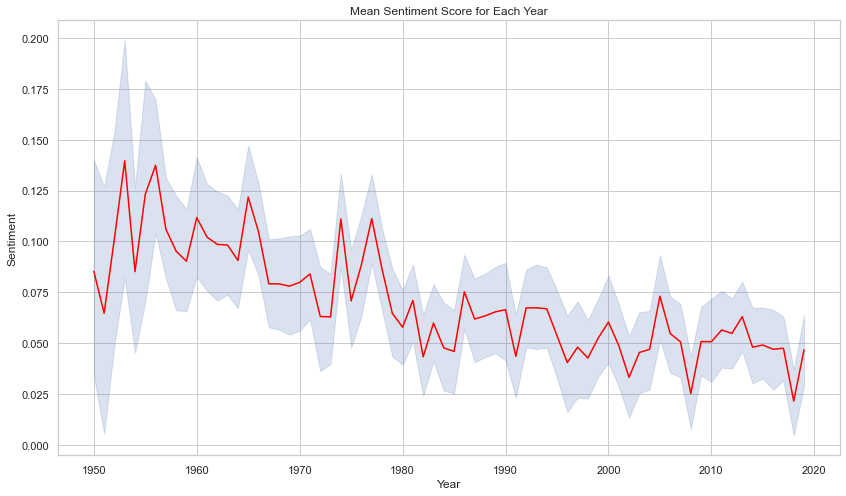

In [36]:

plt.figure(figsize=(14,8))
sns.lineplot(x='release_date', y='Sentiment', data=df_unsuccessful)
plt.title('Mean Sentiment Score for Each Year')

plt.xlabel('Year')
plt.gca().lines[0].set_color('red')

sns.set_theme(style="whitegrid")

/var/folders/sv/9vbm2pzs30b43skf5vgg5bb40000gn/T/ipykernel_26349/3230247777.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dancibility, label='danceability')
/var/folders/sv/9vbm2pzs30b43skf5vgg5bb40000gn/T/ipykernel_26349/3230247777.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ene

Text(0, 0.5, 'Density')

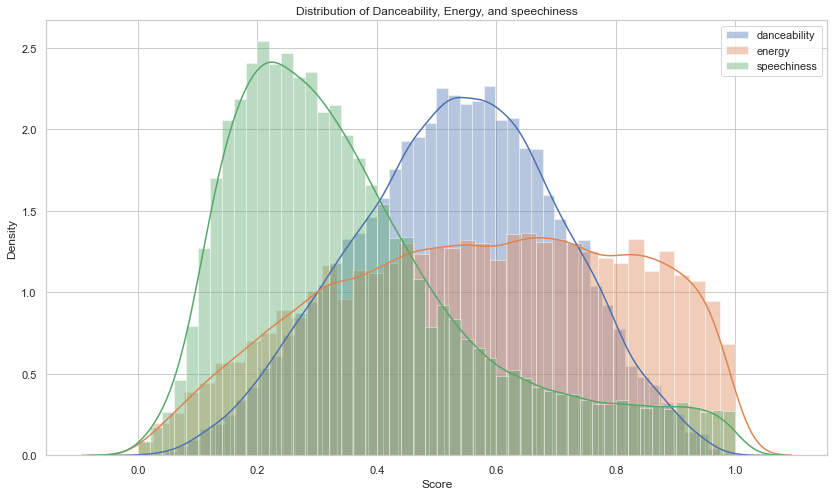

In [37]:
dancibility = df_unsuccessful['danceability']
energy = df_unsuccessful['energy']
speachness = df_unsuccessful['len']


speachness = (speachness - speachness.min()) / (speachness.max() - speachness.min())

plt.figure(figsize=(14,8))
sns.distplot(dancibility, label='danceability')
sns.distplot(energy, label='energy')
sns.distplot(speachness, label='speechiness')
plt.legend()
plt.title('Distribution of Danceability, Energy, and speechiness')
plt.xlabel('Score')
plt.ylabel('Density')

/var/folders/sv/9vbm2pzs30b43skf5vgg5bb40000gn/T/ipykernel_26349/2690552605.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(acousticness, label='acousticness')
/var/folders/sv/9vbm2pzs30b43skf5vgg5bb40000gn/T/ipykernel_26349/2690552605.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(va

(0.0, 7.0)

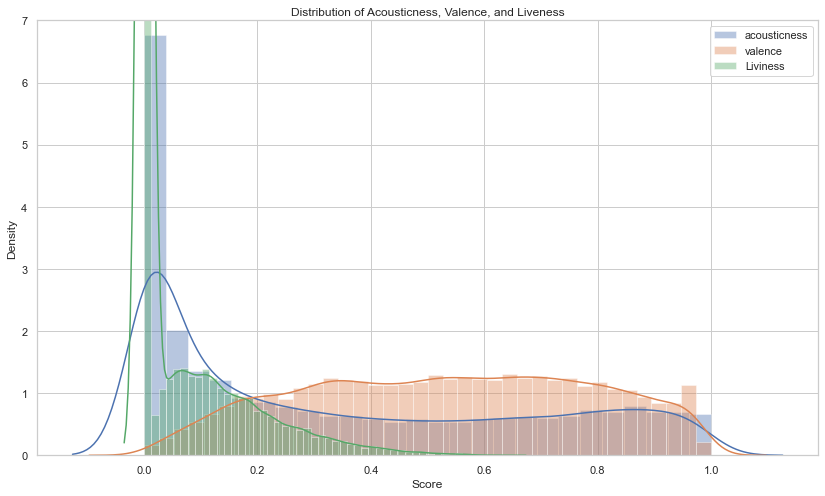

In [38]:
acousticness = df_unsuccessful['acousticness']
valence = df_unsuccessful['valence']
Liviness = df_unsuccessful['movement/places']

movement_places = (Liviness - Liviness.min()) / (Liviness.max() - Liviness.min())

plt.figure(figsize=(14,8))
sns.distplot(acousticness, label='acousticness')
sns.distplot(valence, label='valence')
sns.distplot(Liviness, label='Liviness')
plt.legend()
plt.title('Distribution of Acousticness, Valence, and Liveness')
plt.xlabel('Score')
plt.ylabel('Density')

plt.ylim(0, 7)

/var/folders/sv/9vbm2pzs30b43skf5vgg5bb40000gn/T/ipykernel_26349/2222295004.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loudness, label='loudness')


(0.0, 4.0)

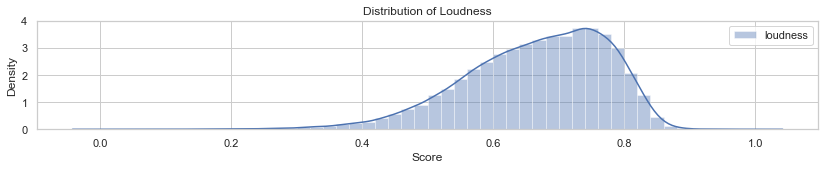

In [39]:
loudness = df_unsuccessful['loudness']

loudness = (loudness - loudness.min()) / (loudness.max() - loudness.min())


plt.figure(figsize=(14,2))
sns.distplot(loudness, label='loudness')
plt.legend()
plt.title('Distribution of Loudness')
plt.xlabel('Score')

plt.ylim(0, 4)

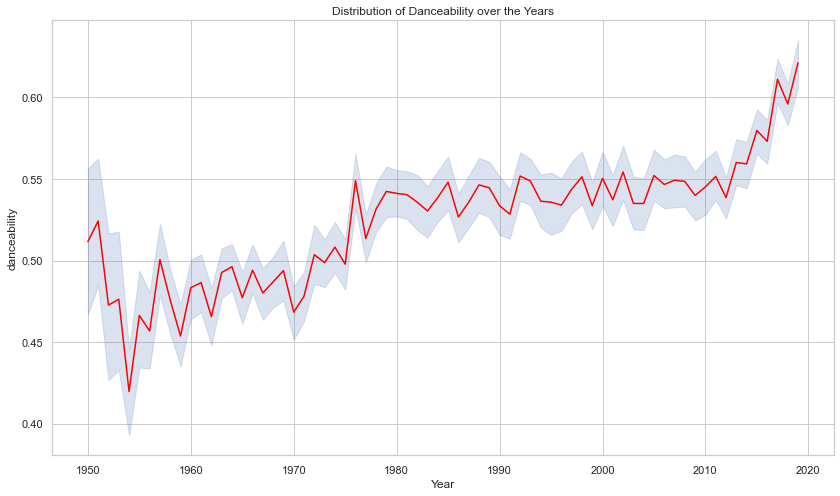

In [40]:
plt.figure(figsize=(14,8))
sns.lineplot(x='release_date', y='danceability', data=df_unsuccessful)
plt.title('Distribution of Danceability over the Years')
plt.xlabel('Year')
plt.gca().lines[0].set_color('red')

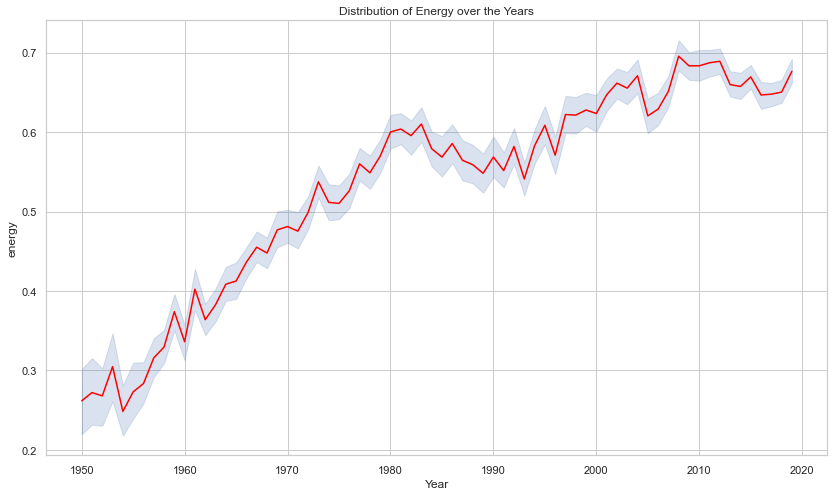

In [41]:
plt.figure(figsize=(14,8))
sns.lineplot(x='release_date', y='energy', data=df_unsuccessful)
plt.title('Distribution of Energy over the Years')
plt.xlabel('Year')
plt.gca().lines[0].set_color('red')

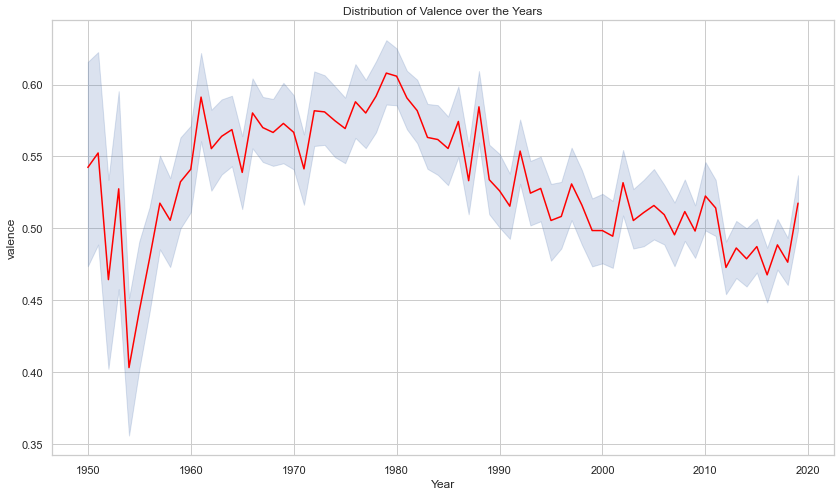

In [42]:
plt.figure(figsize=(14,8))
sns.lineplot(x='release_date', y='valence', data=df_unsuccessful)
plt.title('Distribution of Valence over the Years')
plt.xlabel('Year')
plt.gca().lines[0].set_color('red')

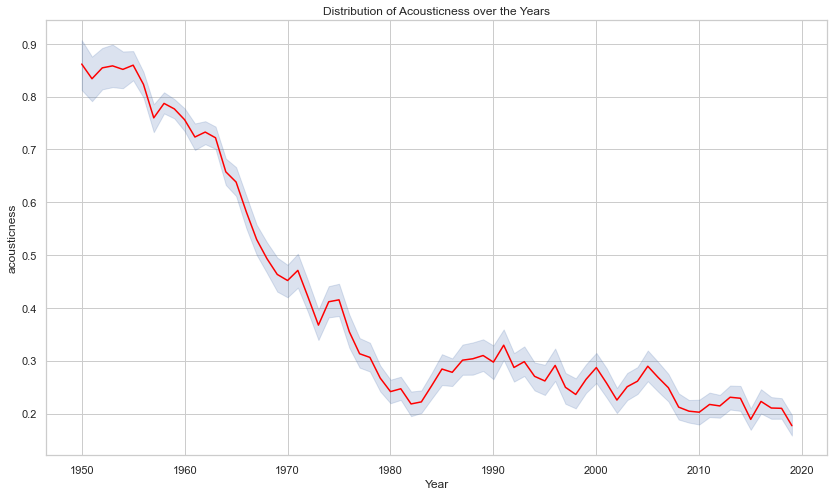

In [43]:
plt.figure(figsize=(14,8))
sns.lineplot(x='release_date', y='acousticness', data=df_unsuccessful)
plt.title('Distribution of Acousticness over the Years')
plt.xlabel('Year')
plt.gca().lines[0].set_color('red')

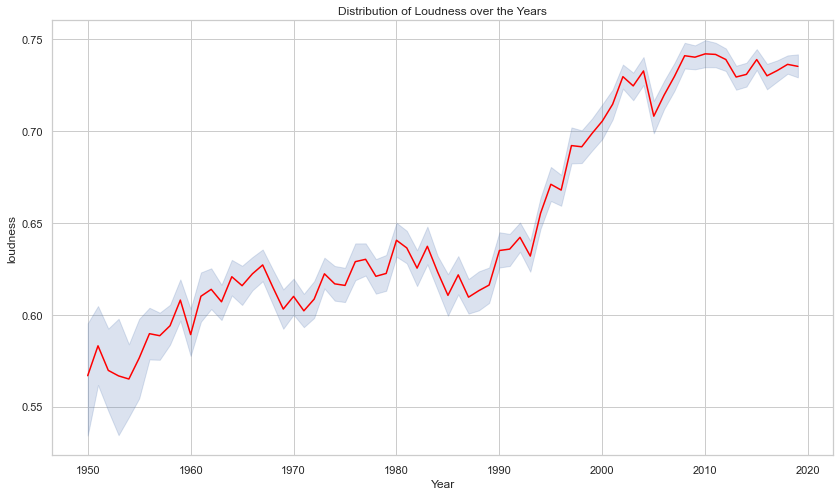

In [44]:
plt.figure(figsize=(14,8))
sns.lineplot(x='release_date', y='loudness', data=df_unsuccessful)
plt.title('Distribution of Loudness over the Years')
plt.xlabel('Year')
plt.gca().lines[0].set_color('red')

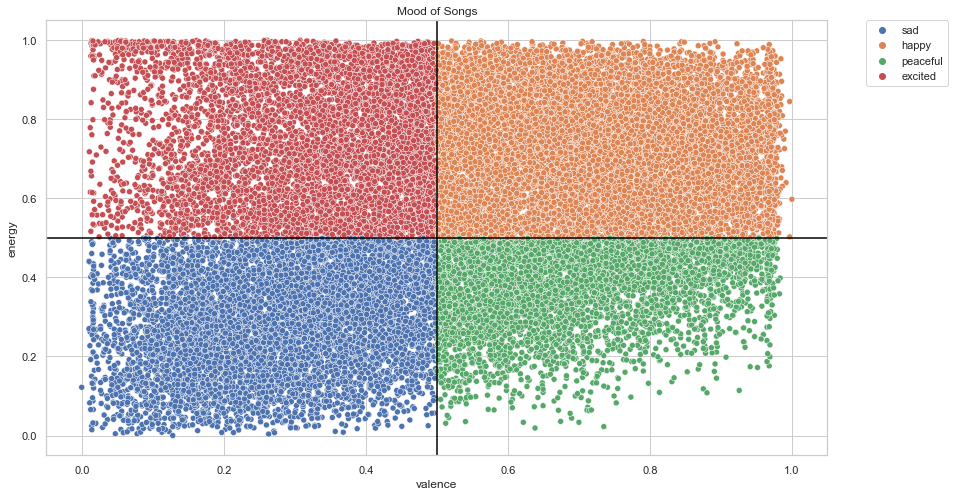

In [45]:
# “happy”: valence > 0.5, arousal (energy) > 0.5;
# “excited”: valence <= 0.5, arousal (energy) > 0.5;
# “sad”: valence <= 0.5, arousal (energy) <= 0.5;
# “peaceful”: valence > 0.5, arousal (energy) <= 0.5.

df_unsuccessful['mood'] = 'happy'
df_unsuccessful.loc[(df_unsuccessful['valence'] <= 0.5) & (df_unsuccessful['energy'] > 0.5), 'mood'] = 'excited'
df_unsuccessful.loc[(df_unsuccessful['valence'] <= 0.5) & (df_unsuccessful['energy'] <= 0.5), 'mood'] = 'sad'
df_unsuccessful.loc[(df_unsuccessful['valence'] > 0.5) & (df_unsuccessful['energy'] <= 0.5), 'mood'] = 'peaceful'

plt.figure(figsize=(14,8))
sns.scatterplot(x='valence', y='energy', hue='mood', data=df_unsuccessful)
plt.title('Mood of Songs')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axvline(x=0.5, color='black')
plt.axhline(y=0.5, color='black')


plt.show()

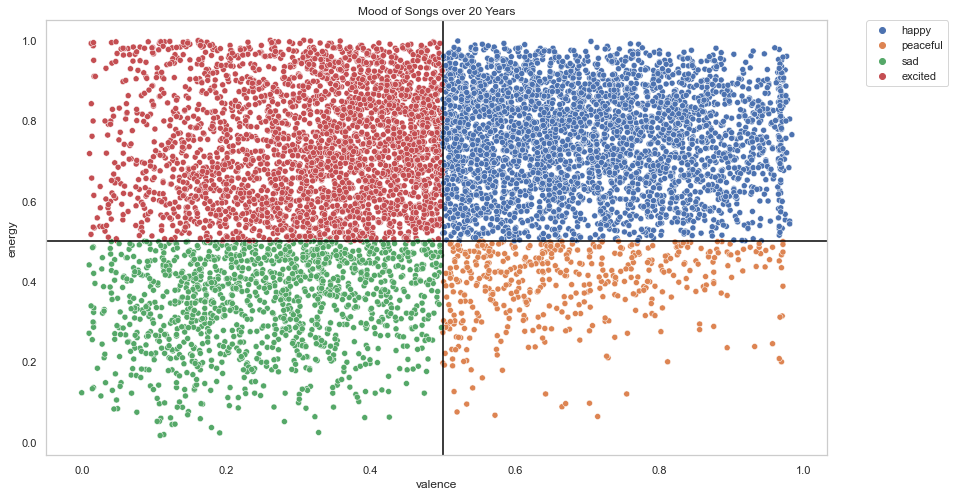

In [46]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='valence', y='energy', hue='mood', data=df_unsuccessful[df_unsuccessful['release_date'] >= 2005])
plt.title('Mood of Songs over 20 Years')
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axvline(x=0.5, color='black')
plt.axhline(y=0.5, color='black')

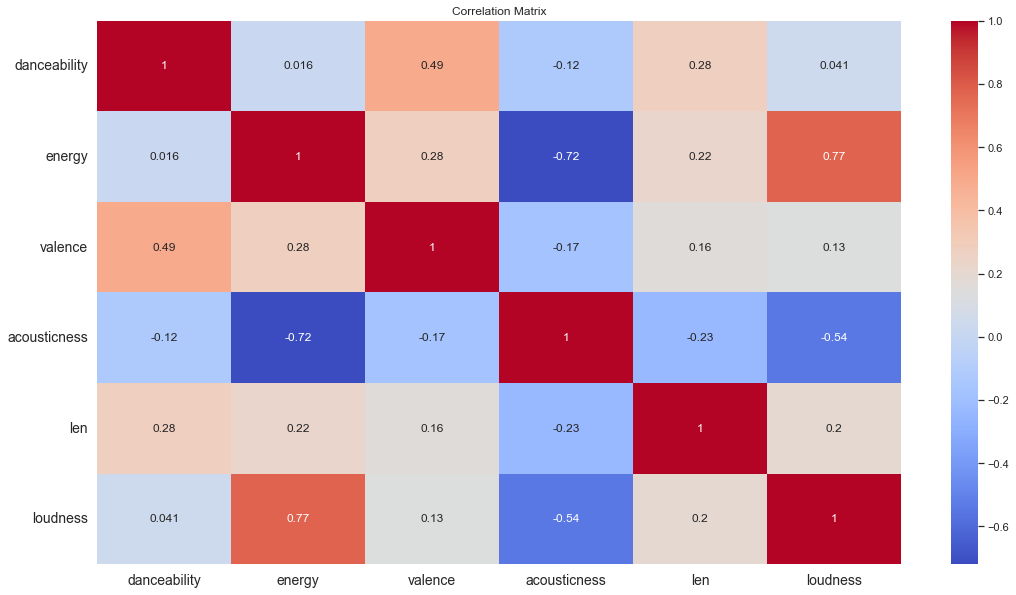

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_unsuccessful[['danceability', 'energy', 'valence', 'acousticness', 'loudness','len', 'instrumentalness']] = scaler.fit_transform(df_unsuccessful[['danceability', 'energy', 'valence', 'acousticness', 'loudness', 'len','instrumentalness' ]])

plt.figure(figsize=(18,10))
sns.heatmap(df_unsuccessful[['danceability', 'energy', 'valence', 'acousticness', 'len','loudness']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.yticks(rotation=0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()